In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sidetable
import matplotlib.pyplot as plt
import altair as alt

Nuestro trabajo se centra en las profesiones relacionadas con la gestión de datos o la "DATA". Es un estudio que se ha realizado
a 25,973 profesionales de diferentes categorías de 171 paises diferentes. Veamos cómo podemos organizar y hacer una limpieza de 
los datos para entenderlos y ver la relación entre ellos.

En primer lugar, cargamos el .CSV para tener una idea de lo que se refleja en nuestra tabla:

In [2]:
df = pd.read_csv("kaggle_table.csv")
df.head(2)

C:\Users\alici\AppData\Local\Temp\ipykernel_2216\2500665077.py:1: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("kaggle_table.csv")


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hacemos un análisis de la forma de nuestros datos: columnas, filas, tipos de elementos, etc.

In [3]:
df.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=369)

Podemos observar que poseemos 25.974 filas y 369 columnas 

In [4]:
df.shape # 25974 filas. 369 columnas

(25974, 369)

La mayor parte de los elementos que en ella se representa son objetos, secuencias de caracteres.

In [5]:
df.dtypes

Time from Start to Finish (seconds)    object
Q1                                     object
Q2                                     object
Q3                                     object
Q4                                     object
                                        ...  
Q38_B_Part_8                           object
Q38_B_Part_9                           object
Q38_B_Part_10                          object
Q38_B_Part_11                          object
Q38_B_OTHER                            object
Length: 369, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: object(369)
memory usage: 73.1+ MB


Una vez que tenemos la información general de la forma de la tabla, calculamos el porcentaje de nulos que presenta
para poder manajar mejor los datos:

In [7]:
(df.isnull().sum() * 100) / df.shape[0]

Time from Start to Finish (seconds)     0.000000
Q1                                      0.000000
Q2                                      0.000000
Q3                                      0.000000
Q4                                      0.000000
                                         ...    
Q38_B_Part_8                           96.069146
Q38_B_Part_9                           97.432047
Q38_B_Part_10                          89.420189
Q38_B_Part_11                          82.509433
Q38_B_OTHER                            98.544699
Length: 369, dtype: float64

Mostramos una breve descripción de los datos para comprobar qué frecuencia existe entre ellos, cuáles son los datos que más
se repiten y cuantas respuetas únicas hay. Como se puede comprobar, las personas de sexo masculino entre 25-29 años y pertenecientes 
a India han sido el porcentaje más destacado.


In [8]:
df.describe(include = "object").T


#count son las filas o elementos,
# unique: etiquetas diferentes (categorias) y las que más se repiten están en (top)


,count,unique,top,freq
Time from Start to Finish (seconds),25974,5410,484,42
Q1,25974,12,25-29,4931
Q2,25974,6,Man,20598
Q3,25974,67,India,7434
Q4,25974,8,Master’s degree,10132
...,...,...,...,...
Q38_B_Part_8,1021,2,ClearML,1020
Q38_B_Part_9,667,2,Domino Model Monitor,666
Q38_B_Part_10,2748,2,MLflow,2747
Q38_B_Part_11,4543,2,None,4542


En cuanto a la limpieza y orden, en primer lugar, nos planteamos seleccionar las columnas que nos interesan para hacer las 
comparativas para lugo, darle un nombre más concreto y hacer sus datos mejor visibles.

Poseemos 39 clasificaciones en 369 columnas, algunas con información relevante como puede ser la profesión y categoría del profesional dentro de las ramas
gestión de datos, país, sexo, lenguajes de programación que dominan, herramientas con las que trabajan, etc.

In [9]:
pd.options.display.max_columns = None
df.head(2)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_Part_16,Q16_Part_17,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_OTHER,Q25,Q26,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q32_A_Part_1,Q32_A_Part_2,Q32_A_Part_3,Q32_A_Part_4,Q32_A_Part_5,Q32_A_Part_6,Q32_A_Part_7,Q32_A_Part_8,Q32_A_Part_9,Q32_A_Part_10,Q32_A_Part_11,Q32_A_Part_12,Q32_A_Part_13,Q32_A_Part_14,Q32_A_Part_15,Q32_A_Part_16,Q32_A_Part_17,Q32_A_Part_18,Q32_A_Part_19,Q32_A_Part_20,Q32_A_OTHER,Q33,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_Part_12,Q34_A_Part_13,Q34_A_Part_14,Q34_A_Part_15,Q34_A_Part_16,Q34_A_OTHER,Q35,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q41,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B

Al no poder leer bien la columna "Q26" extraemos su título para ver de qué se trata y si nos podría interesar,
sus datos no son relevantes y no la seleccionaremos dentro de las columnas elegidas.

In [10]:
df["Q26"][0] 

'Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?'

Seleccionamos las columnas que nos interesan: edad, sexo, país, nivel educativo, posición profesional, tamaño de empresa y rango salarial percibido.

In [11]:
df_resumen = df[["Q1","Q2","Q3","Q4","Q5", "Q21", "Q25"]]
df_resumen.head(2)

,Q1,Q2,Q3,Q4,Q5,Q21,Q25
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,What is your current yearly compensation (appr...
1,50-54,Man,India,Bachelor’s degree,Other,50-249 employees,"25,000-29,999"


Las renombramos para que sean más fáciles de leer:

In [12]:
df_resumen.rename(columns = {"Q1": "Edad","Q2":"Sexo","Q3":"Pais","Q4":"Educacion","Q5":"Posicion","Q21":"Tamaño_empresa","Q25":"SBA"}, inplace = True)
df_resumen.head(2) 

C:\Users\alici\AppData\Local\Temp\ipykernel_2216\2019693059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resumen.rename(columns = {"Q1": "Edad","Q2":"Sexo","Q3":"Pais","Q4":"Educacion","Q5":"Posicion","Q21":"Tamaño_empresa","Q25":"SBA"}, inplace = True)


,Edad,Sexo,Pais,Educacion,Posicion,Tamaño_empresa,SBA
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,What is your current yearly compensation (appr...
1,50-54,Man,India,Bachelor’s degree,Other,50-249 employees,"25,000-29,999"


Eliminamos la primera fila de títulos anteriores para más orden:

In [13]:
df_resumido= df_resumen.drop(0)
df_resumido.head(3)

,Edad,Sexo,Pais,Educacion,Posicion,Tamaño_empresa,SBA
1,50-54,Man,India,Bachelor’s degree,Other,50-249 employees,"25,000-29,999"
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,"1000-9,999 employees","60,000-69,999"
3,22-24,Man,Pakistan,Master’s degree,Software Engineer,"1000-9,999 employees",$0-999


Identificamos los valores nulos que puedan seguir apareciendo. En este caso tenemos 9722 y 10582 en las columnas de 
tamaño de empresa y SBA.

In [14]:
df_resumido.isnull().sum()

Edad                  0
Sexo                  0
Pais                  0
Educacion             0
Posicion              0
Tamaño_empresa     9722
SBA               10582
dtype: int64

Para limpiar y organizar mejor los datos, vamos a centrarnos en la columna relacionada al tamaño de las empresas, donde aparecen
los intervalos de nº de empleados que en ellas están, para ello, spliteamos los valoares a aprtir del 1º espacio para manejar mejor los datos y creamos una segunda columna con los datos simplificados.

In [15]:
df_resumido["Tamaño-empresa"] = df_resumido["Tamaño_empresa"].str.split(" ", n= 1,  expand = True).iloc[:, 0]
df_resumido.head(2)

,Edad,Sexo,Pais,Educacion,Posicion,Tamaño_empresa,SBA,Tamaño-empresa
1,50-54,Man,India,Bachelor’s degree,Other,50-249 employees,"25,000-29,999",50-249
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,"1000-9,999 employees","60,000-69,999","1000-9,999"


Veamos los valores que aparecen en la columna:

In [16]:
df_resumido["Tamaño-empresa"].unique()

array(['50-249', '1000-9,999', nan, '10,000', '0-49', '250-999'],
      dtype=object)

Quitamos los nulos:

In [17]:
resumen = df_resumido[df_resumido["Tamaño-empresa"].notnull()]
resumen["Tamaño-empresa"].unique()

array(['50-249', '1000-9,999', '10,000', '0-49', '250-999'], dtype=object)

Borramos la columna de "Tamaño_empresa" ya que tiene datos que no nos interesan ya:

In [18]:
resumen= resumen[["Edad", "Sexo","Pais", "Educacion","Posicion", "Tamaño-empresa","SBA"]]
resumen.head(2)

,Edad,Sexo,Pais,Educacion,Posicion,Tamaño-empresa,SBA
1,50-54,Man,India,Bachelor’s degree,Other,50-249,"25,000-29,999"
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,"1000-9,999","60,000-69,999"


Quitamos los guiones para poder usar los números, reemplazandolos por espacios:

In [19]:
resumen["Tamaño-empresa"]= resumen["Tamaño-empresa"].str.replace("-"," ",)
resumen.head(2)

,Edad,Sexo,Pais,Educacion,Posicion,Tamaño-empresa,SBA
1,50-54,Man,India,Bachelor’s degree,Other,50 249,"25,000-29,999"
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,"1000 9,999","60,000-69,999"


Eliminamos las posibles comas(",") que haya en los valores:

In [20]:
resumen["Tamaño-empresa"]= resumen["Tamaño-empresa"].str.replace(",","",)
resumen.head(2)

,Edad,Sexo,Pais,Educacion,Posicion,Tamaño-empresa,SBA
1,50-54,Man,India,Bachelor’s degree,Other,50 249,"25,000-29,999"
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,1000 9999,"60,000-69,999"


Volvemos a quitar nulos ya que han vuelto a aparecer:

In [21]:
resumen1 = resumen[resumen["Tamaño-empresa"].notnull()]
resumen1["Tamaño-empresa"].unique()


array(['50 249', '1000 9999', '10000', '0 49', '250 999'], dtype=object)

Nos gustaría calcular la media de empleados de los profesionales participantes, para ello, dividimos los valores mínimos del rango y máximos en dos columnas para después poder hacer la media de ellas. Creamos las columnas "Tam1" y "Tam2":

In [22]:
resumen1[["Tam1", "Tam2"]] = resumen1["Tamaño-empresa"].str.split(" ", expand = True)
resumen1.head(2)

,Edad,Sexo,Pais,Educacion,Posicion,Tamaño-empresa,SBA,Tam1,Tam2
1,50-54,Man,India,Bachelor’s degree,Other,50 249,"25,000-29,999",50,249
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,1000 9999,"60,000-69,999",1000,9999


Como aparecen nulos, los volvemos a quitar:

In [23]:
resumen2 = resumen1[resumen1["Tam2"].notnull()]
resumen2["Tam2"].unique()

array(['249', '9999', '49', '999'], dtype=object)

Para hacer las medias, convertimos lo valores a integer y hacer las operaciones correspondientes:

In [24]:
resumen2["Tam1"] = resumen2["Tam1"].astype(int)
resumen2["Tam2"] = resumen2["Tam2"].astype(int)

C:\Users\alici\AppData\Local\Temp\ipykernel_2216\3898133768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resumen2["Tam1"] = resumen2["Tam1"].astype(int)
C:\Users\alici\AppData\Local\Temp\ipykernel_2216\3898133768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resumen2["Tam2"] = resumen2["Tam2"].astype(int)


Hacemos la media entre las dos columas de empresas donde se creará una nueva con los resultados:

In [25]:
resumen2["Tamaño_empresa"]=(resumen2["Tam1"] + resumen2["Tam2"])/2
resumen2.head(2)

C:\Users\alici\AppData\Local\Temp\ipykernel_2216\2963574698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resumen2["Tamaño_empresa"]=(resumen2["Tam1"] + resumen2["Tam2"])/2


,Edad,Sexo,Pais,Educacion,Posicion,Tamaño-empresa,SBA,Tam1,Tam2,Tamaño_empresa
1,50-54,Man,India,Bachelor’s degree,Other,50 249,"25,000-29,999",50,249,149.5
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,1000 9999,"60,000-69,999",1000,9999,5499.5


In [26]:
resumen2["Tamaño_empresa"]= resumen2["Tamaño_empresa"].replace(",","",)
resumen2.head(2)

C:\Users\alici\AppData\Local\Temp\ipykernel_2216\1392867410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resumen2["Tamaño_empresa"]= resumen2["Tamaño_empresa"].replace(",","",)


,Edad,Sexo,Pais,Educacion,Posicion,Tamaño-empresa,SBA,Tam1,Tam2,Tamaño_empresa
1,50-54,Man,India,Bachelor’s degree,Other,50 249,"25,000-29,999",50,249,149.5
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,1000 9999,"60,000-69,999",1000,9999,5499.5


Y a continuación nos quedamos solo con la columna de Tamaño de empresa que nos interesa, la que tiene reflejada la media de los 
rangos de número de empleados, "Tamaño_empresa":

In [27]:
resumen2= resumen2[["Edad", "Sexo","Pais", "Educacion","Posicion","Tamaño_empresa","SBA"]]
resumen2.head(2)

,Edad,Sexo,Pais,Educacion,Posicion,Tamaño_empresa,SBA
1,50-54,Man,India,Bachelor’s degree,Other,149.5,"25,000-29,999"
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,5499.5,"60,000-69,999"


Convertimos los valores en string:

In [28]:
resumen2["Tamaño_empresa"] = resumen2["Tamaño_empresa"].astype(int)
resumen2.dtypes

Edad              object
Sexo              object
Pais              object
Educacion         object
Posicion          object
Tamaño_empresa     int32
SBA               object
dtype: object

Observamos cuáles son los valores únicos de la columna para después categorizarlos con etiquetas según su tamaño, para ello
debemos crear un diccionario donde quede reflejado los tamaños de las empresas y sus categorías, que serán: 
"Pyme": para empresas de hasta 24 empleados
"Pequeña-mediana": para aquellas que tengan hasta 149 empleados
"Grande": con número de hasta 624 profesionales
"Multinacional": empresas con hasta 5499 personas

In [29]:
resumen2["Tamaño_empresa"].unique()

array([ 149, 5499,   24,  624])

In [30]:
tamaño= {24:'Pyme',
          149:'Pequeña-mediana', 
          624:'Grande', 
          5499:'Multinacional'}  

resumen2["Tamaño_empresa"] = resumen2["Tamaño_empresa"].map(tamaño)
resumen2.head()

,Edad,Sexo,Pais,Educacion,Posicion,Tamaño_empresa,SBA
1,50-54,Man,India,Bachelor’s degree,Other,Pequeña-mediana,"25,000-29,999"
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,Multinacional,"60,000-69,999"
3,22-24,Man,Pakistan,Master’s degree,Software Engineer,Multinacional,$0-999
4,45-49,Man,Mexico,Doctoral degree,Research Scientist,Multinacional,"30,000-39,999"
5,45-49,Man,India,Doctoral degree,Other,Pequeña-mediana,"30,000-39,999"


Ahora nos centraremos en limpiar y organizar la columna relacionada con los rangos salariales ("SBA"). Primero veremos los datos que tenemos , y después eliminaremos comas y elementos no numéricos que puedan aparecer:

In [31]:
resumen2["SBA"].unique()

array(['25,000-29,999', '60,000-69,999', '$0-999', '30,000-39,999',
       '70,000-79,999', '2,000-2,999', '10,000-14,999', '20,000-24,999',
       '100,000-124,999', '7,500-9,999', nan, '15,000-19,999',
       '4,000-4,999', '40,000-49,999', '50,000-59,999', '5,000-7,499',
       '3,000-3,999', '125,000-149,999', '1,000-1,999', '250,000-299,999',
       '90,000-99,999', '80,000-89,999', '150,000-199,999',
       '200,000-249,999', '300,000-499,999', '>$1,000,000',
       '$500,000-999,999'], dtype=object)

In [32]:
resumen2["SBA"]= resumen2["SBA"].str.replace(",","",)
resumen2.head(2)

,Edad,Sexo,Pais,Educacion,Posicion,Tamaño_empresa,SBA
1,50-54,Man,India,Bachelor’s degree,Other,Pequeña-mediana,25000-29999
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,Multinacional,60000-69999


In [33]:
import re

Utilizaremos Regex para eliminar símbolos numéricos que aparecen.

In [34]:
resumen2["SBA"] = resumen2["SBA"].replace('\$|>', "", regex = True)

In [35]:
resumen2.head(2)

,Edad,Sexo,Pais,Educacion,Posicion,Tamaño_empresa,SBA
1,50-54,Man,India,Bachelor’s degree,Other,Pequeña-mediana,25000-29999
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,Multinacional,60000-69999


Hacemos un nuevo dataframe sin los nulos para poder calcular las medias y así, ir especificando datos:

In [36]:
resumen3 = resumen2[resumen2["SBA"].notnull()]
resumen3.head(2)

,Edad,Sexo,Pais,Educacion,Posicion,Tamaño_empresa,SBA
1,50-54,Man,India,Bachelor’s degree,Other,Pequeña-mediana,25000-29999
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,Multinacional,60000-69999


Quitamos los guiones para poder usar los números y como anteriormente, creamos dos nuevas columnas para dividir los salarios por rangos en cada fila.

In [37]:
resumen3["SBA"]= resumen3["SBA"].str.replace("-"," ",)
resumen3.head(5)

C:\Users\alici\AppData\Local\Temp\ipykernel_2216\1243105554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resumen3["SBA"]= resumen3["SBA"].str.replace("-"," ",)


,Edad,Sexo,Pais,Educacion,Posicion,Tamaño_empresa,SBA
1,50-54,Man,India,Bachelor’s degree,Other,Pequeña-mediana,25000 29999
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,Multinacional,60000 69999
3,22-24,Man,Pakistan,Master’s degree,Software Engineer,Multinacional,0 999
4,45-49,Man,Mexico,Doctoral degree,Research Scientist,Multinacional,30000 39999
5,45-49,Man,India,Doctoral degree,Other,Pequeña-mediana,30000 39999


In [38]:
resumen3[["Min", "Max"]] = resumen3["SBA"].str.split(" ", expand = True)

C:\Users\alici\AppData\Local\Temp\ipykernel_2216\2972690263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resumen3[["Min", "Max"]] = resumen3["SBA"].str.split(" ", expand = True)
C:\Users\alici\AppData\Local\Temp\ipykernel_2216\2972690263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resumen3[["Min", "Max"]] = resumen3["SBA"].str.split(" ", expand = True)


In [39]:
resumen3.head(2)

,Edad,Sexo,Pais,Educacion,Posicion,Tamaño_empresa,SBA,Min,Max
1,50-54,Man,India,Bachelor’s degree,Other,Pequeña-mediana,25000 29999,25000,29999
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,Multinacional,60000 69999,60000,69999


Ya separadas las filas, veamos si tenemos valores nulos para quitarlos si existieran:

In [40]:
resumen3["Max"].unique()

array(['29999', '69999', '999', '39999', '79999', '2999', '14999',
       '24999', '124999', '9999', '19999', '4999', '49999', '59999',
       '7499', '3999', '149999', '1999', '299999', '99999', '89999',
       '199999', '249999', '499999', None, '999999'], dtype=object)

In [41]:
resumen3 = resumen3[resumen3["Max"].notnull()]
resumen3.head(2)

,Edad,Sexo,Pais,Educacion,Posicion,Tamaño_empresa,SBA,Min,Max
1,50-54,Man,India,Bachelor’s degree,Other,Pequeña-mediana,25000 29999,25000,29999
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,Multinacional,60000 69999,60000,69999


Convertirmos los los valores en "int" para poder manejarlos y hacer operaciones numéricas:

In [42]:
resumen3["Min"] = resumen3["Min"].astype(int)
resumen3["Max"] = resumen3["Max"].astype(int)

C:\Users\alici\AppData\Local\Temp\ipykernel_2216\2592355464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resumen3["Min"] = resumen3["Min"].astype(int)
C:\Users\alici\AppData\Local\Temp\ipykernel_2216\2592355464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resumen3["Max"] = resumen3["Max"].astype(int)


Hacemos la media de las columnas "Max" y "Min" y conocer así, la media salarial que perciben los profesionales.

In [43]:
resumen3["Salario"]= (resumen3["Max"] + resumen3["Min"])/2
resumen3.head()

C:\Users\alici\AppData\Local\Temp\ipykernel_2216\2671711928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resumen3["Salario"]= (resumen3["Max"] + resumen3["Min"])/2


,Edad,Sexo,Pais,Educacion,Posicion,Tamaño_empresa,SBA,Min,Max,Salario
1,50-54,Man,India,Bachelor’s degree,Other,Pequeña-mediana,25000 29999,25000,29999,27499.5
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,Multinacional,60000 69999,60000,69999,64999.5
3,22-24,Man,Pakistan,Master’s degree,Software Engineer,Multinacional,0 999,0,999,499.5
4,45-49,Man,Mexico,Doctoral degree,Research Scientist,Multinacional,30000 39999,30000,39999,34999.5
5,45-49,Man,India,Doctoral degree,Other,Pequeña-mediana,30000 39999,30000,39999,34999.5


Eliminamos las columnas que ya no nos son útiles para ir acotando datos. Presentaremos la tabla solo con los datos de la columna "Salario"

In [44]:
resumen3= resumen3[["Edad","Sexo","Pais","Educacion","Posicion","Tamaño_empresa","Salario"]]
resumen3.head(2)

,Edad,Sexo,Pais,Educacion,Posicion,Tamaño_empresa,Salario
1,50-54,Man,India,Bachelor’s degree,Other,Pequeña-mediana,27499.5
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,Multinacional,64999.5


Convertimos los datos de la columna para que sean manejables, quitamos comas y los categorizamos también creando un nuevo diccionario:

In [45]:
resumen3["Salario"] = resumen3["Salario"].astype(int)
resumen3.dtypes

Edad              object
Sexo              object
Pais              object
Educacion         object
Posicion          object
Tamaño_empresa    object
Salario            int32
dtype: object

In [46]:
resumen3["Salario"]= resumen3["Salario"].replace(".","",)
resumen3.head(2)

,Edad,Sexo,Pais,Educacion,Posicion,Tamaño_empresa,Salario
1,50-54,Man,India,Bachelor’s degree,Other,Pequeña-mediana,27499
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,Multinacional,64999


Y como podemos ver arriba, ya tenemos lista también nuestra columna salarial con las medias y los datos totalmente claros.

El siguiente paso es, puesto que tenemos una lista inmensa de paises, ya que la encuesta se ha realizado a nivel mundial, vamos a crear un diccionario  y los clasificaremos por zonas geográficas, en este caso, por continentes. Dejando al margen a India y Rusia por su extensión:

In [47]:
paises = {"India":"India",
          'Indonesia':'Asia', 
          'Pakistan':'M.Oriente',
          'Mexico':'A.Latina', 
          'Turkey':"Europa",
           'Australia':"Oceania",
            'Nigeria':"Africa",
            'Greece':"Europa" ,
            'Belgium':"Europa",
            "Egypt":"Africa",
            "Singapore":'Asia',
            'Brazil':"A.Latina",
            'Poland':"Europa",
            'Japan':"Asia",
            'Italy':"Europa",
            'United States of America':"N.America",
            'Viet Nam':"Asia",
            'China':"Asia",
            'Israel': "M.Oriente",
            "South Africa":"Africa",
            'Other':"Otros",
            'Bangladesh':"Asia",
            'Russia':"Rusia",
            'United Kingdom of Great Britain and Northern Ireland':"Europa",
            "Iran, Islamic Republic of...":'M.Oriente',
            'France':"Europa",
            'Tunisia':"Africa",
            'Argentina':"A.Latina",
            'I do not wish to disclose my location':"Otros",
            'Colombia':"A.Latina",
            'Sweden':"Europa",
            'Chile': "A.Latina",
            'Saudi Arabia':"M.Oriente",
            'Spain': "Europa",
            'Austria': "Europa",
            'Kenya': "Africa",
            'Canada':"N.America",
            'Ireland':"Europa",
            'Portugal':"Europa", 
            'Hong Kong (S.A.R.)':"Asia",
            'Ukraine': "Europa", 
            'Denmark': "Europa",
            'Germany': "Europa",
            'South Korea':"Asia",
          'Sri Lanka':"M.Oriente",
        'Netherlands':"Europa",
        'Ghana':"Africa",
        'Malaysia': "Asia",
        'Nepal':"Asia",
        'Kazakhstan':"M.Oriente",
        'Taiwan':"Asia",
        'Switzerland': "Europa", 
        'Peru':"A.Latina", 
        'Morocco': "Africa",
        'United Arab Emirates': "M.Oriente",
        'Algeria':"Africa",
        'Ethiopia':"Africa",
        'Philippines':"Asia",
        'Romania':"Europa",
        'Iraq':"M.Oriente",
        'Thailand':"Asia",
        'Ecuador':"A.Latina",
        'Kazakhstan': "M.Oriente",
        'Uganda':"Africa",
        'Norway':"Europa",
        'Belarus':"Europa",
        'Czech Republic':"Europa"} 

resumen3["Pais"] = resumen3["Pais"].map(paises)
resumen3.head(4)

,Edad,Sexo,Pais,Educacion,Posicion,Tamaño_empresa,Salario
1,50-54,Man,India,Bachelor’s degree,Other,Pequeña-mediana,27499
2,50-54,Man,Asia,Master’s degree,Program/Project Manager,Multinacional,64999
3,22-24,Man,M.Oriente,Master’s degree,Software Engineer,Multinacional,499
4,45-49,Man,A.Latina,Doctoral degree,Research Scientist,Multinacional,34999


En el caso de las posiciones dentro de la profesión también categorizamos para mayor claridad:

In [48]:
categorias= {'Data Scientist':"DS",
          'Software Engineer':'SE', 
          'Research Scientist':'RS', 
          'Machine Learning Engineer':'MLI', 
          'Business Analyst':'BA',
           "Data Analyst":"DA",
             'Statistician':"STD",
             'Program/Project Manager': "PM",
             'Developer Relations/Advocacy':"DEV",
             "Product Manager":"PROMAN",
             "Data Engineer":"DE",
             'DBA/Database Engineer': "DATAEN",
             'Other':"Other"}  

resumen3["Posicion"] = resumen3["Posicion"].map(categorias)
resumen3.head(3)

,Edad,Sexo,Pais,Educacion,Posicion,Tamaño_empresa,Salario
1,50-54,Man,India,Bachelor’s degree,Other,Pequeña-mediana,27499
2,50-54,Man,Asia,Master’s degree,PM,Multinacional,64999
3,22-24,Man,M.Oriente,Master’s degree,SE,Multinacional,499


Volvemos a categorizar la columna de sexos para aunar:

In [49]:
sexo= {'Man':"Man",
          'Woman':'Woman', 
          'Prefer not to say':'Otros',
       'Nonbinary':"Man",
       'Prefer to self-describe':"Man"
          }  

resumen3["Sexo"] = resumen2["Sexo"].map(sexo)
resumen3.head(3)

,Edad,Sexo,Pais,Educacion,Posicion,Tamaño_empresa,Salario
1,50-54,Man,India,Bachelor’s degree,Other,Pequeña-mediana,27499
2,50-54,Man,Asia,Master’s degree,PM,Multinacional,64999
3,22-24,Man,M.Oriente,Master’s degree,SE,Multinacional,499


Aquí podemos ver claramente el resumen de la tabla después de toda la limpieza previa. Podemos decir que tenemos mayor presencia de hombres, personas entre 25-29 años, procedente en su mayor parte de India y que trabajan como Data Scientist en Pymes.

In [52]:
resumen3.head(3)

,Edad,Sexo,Pais,Educacion,Posicion,Tamaño_empresa,Salario
1,50-54,Man,India,Bachelor’s degree,Other,Pequeña-mediana,27499
2,50-54,Man,Asia,Master’s degree,PM,Multinacional,64999
3,22-24,Man,M.Oriente,Master’s degree,SE,Multinacional,499


In [50]:
resumen3.describe(include = "object").T

,count,unique,top,freq
Edad,12117,11,25-29,2551
Sexo,12117,3,Man,9986
Pais,12117,10,India,2287
Educacion,12117,7,Master’s degree,5196
Posicion,12117,13,DS,2562
Tamaño_empresa,12117,4,Pyme,4672


Vamos a hacer una copia de nuestro datafame para empezar a graficar los datos que queremos mostrar y hacer diferentes groupsbys para hacer conteos de los elementos de nuestras columnas y poder reflejarlos en las gráficas, ya que tenemos todos los datos categorizados.

In [53]:
resumen4= resumen3.copy()

In [54]:
resumen4.groupby(['Sexo']).count()

,Edad,Pais,Educacion,Posicion,Tamaño_empresa,Salario
Sexo,,,,,,
Man,9986,9986,9986,9986,9986,9986
Otros,154,154,154,154,154,154
Woman,1977,1977,1977,1977,1977,1977


In [55]:
resumen4.groupby(['Pais']).count()

,Edad,Sexo,Educacion,Posicion,Tamaño_empresa,Salario
Pais,,,,,,
A.Latina,1020,1020,1020,1020,1020,1020
Africa,1106,1106,1106,1106,1106,1106
Asia,1997,1997,1997,1997,1997,1997
Europa,2273,2273,2273,2273,2273,2273
India,2287,2287,2287,2287,2287,2287
M.Oriente,653,653,653,653,653,653
N.America,1406,1406,1406,1406,1406,1406
Oceania,161,161,161,161,161,161
Otros,796,796,796,796,796,796


1. Representamos la presencia de categorias laborales por zonas, donde podemos comprobar que todas las posiciones relacionadas con la gestión de datos, están presentes en todas las zonas geográficas analizadas a nivel mundial.

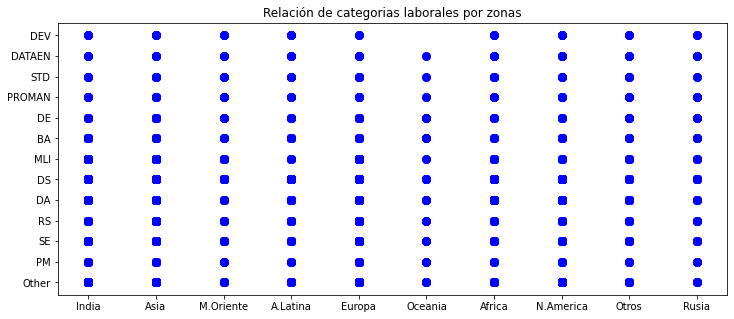

In [59]:
x= resumen4['Pais']
y= resumen4['Posicion']

plt.scatter(x,y,s=60,c='blue')
plt.title('Relación de categorias laborales por zonas')
plt.rcParams["figure.figsize"] = (12, 3)
plt.show();

2. Comprobar la relación de salarios por zonas geográficas que perciben los profesionales. Las tres zonas con salarios más altos son Estados Unidos de América, Canadá, la zona de Oceanía con Australia y Nueva Zelanda y Europa.

Text(0.5, 1.0, 'Relación de salarios por zonas')

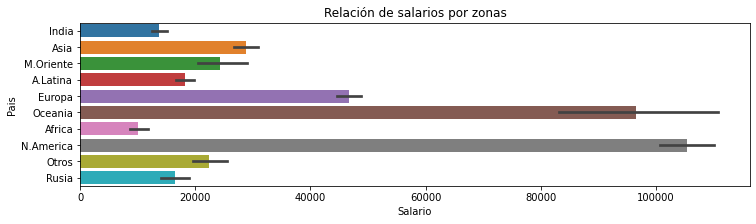

In [60]:
sns.barplot(x='Salario', y='Pais',data=resumen4);
plt.title('Relación de salarios por zonas')

In [61]:
from matplotlib import rcParams

3. Es interesante comprobar la presencia de hombres y mujeres en las diferentes zonas como profesionales del sector, podemos comprobar que la presencia de mujeres no es nada relevante en comparación con los hombres. La zona donde más mujeres hay es en India. 

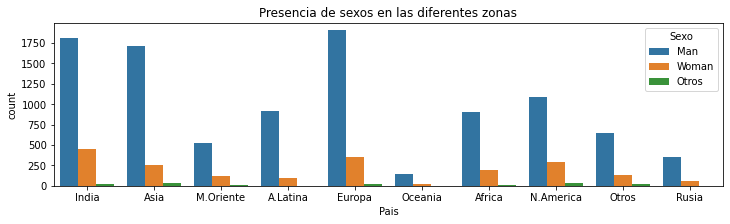

In [62]:
sns.countplot(x=resumen4.Pais, hue=resumen4.Sexo)
plt.title('Presencia de sexos en las diferentes zonas')

rcParams['figure.figsize'] = 10.7,8.27

4. con respecto a la relación entre sexo y posiciones, podemos comprobar que tanto los hombres como las mujeres, están  más enfocados en su desarrollo como científicos/as de datos, ingenieros/as de datos e ingenieros/as de bases de datos.

Volvemos a comprobar la descompensación en la presencia de hombres y mujeres.

Text(0.5, 1.0, 'Presencia de sexos en las posiciones "DATA"')

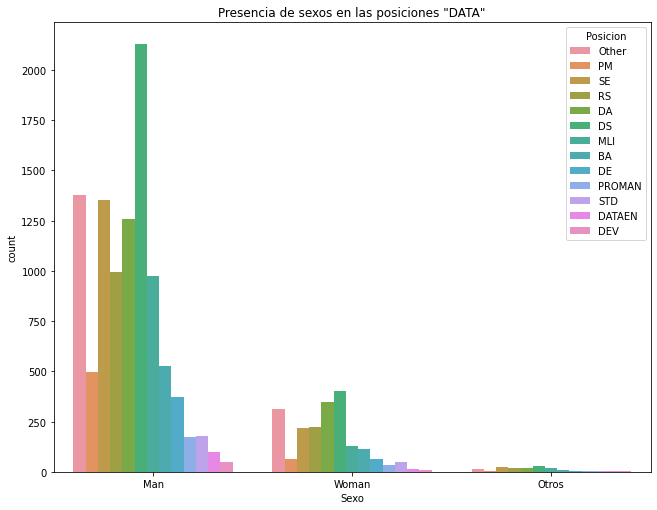

In [63]:
sns.countplot(x=resumen4.Sexo, hue=resumen4.Posicion)
plt.title('Presencia de sexos en las posiciones "DATA"')

5. Ya que hemos comprado que existe una gran diferencia entre el número de profesionales hombes y mujeres que tienen cargos relacionados con la gestión de datos, nos preguntamos si existe alguna otra diferencia entre ellos dentro del sector.

El siguiente gráfico no deja lugar a dudas de que las diferencias entre salario también son notables.

Text(0.5, 1.0, 'Diferencias salariales entre sexos')

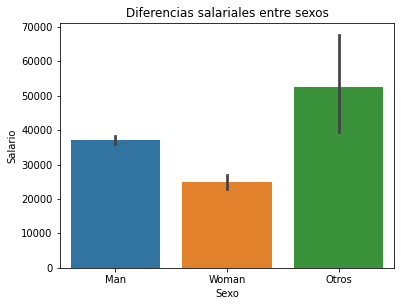

In [64]:
fig, ax = plt.subplots(figsize = (6, 4.5))
sns.barplot(x='Sexo', y='Salario', data=resumen4);
plt.title('Diferencias salariales entre sexos')

6. Tanto si comparamos los salarios de los paises entre los sexos, como si los analizamos entre las diferentes posiciones, la diferencia entre hombres y mujeres es destacable.
   Ellas cobran menos en cualquier pais y en cualquier posición.

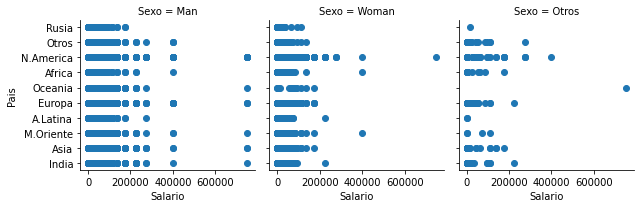

In [66]:
g = sns.FacetGrid(resumen4, col="Sexo")
g = g.map(plt.scatter,"Salario","Pais") 

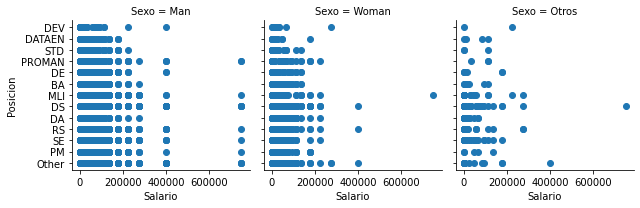

In [67]:
g = sns.FacetGrid(resumen4, col="Sexo")
g = g.map(plt.scatter,"Salario","Posicion")